In [2]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Kerry_th.csv')
#only keep caption column 
df1 = df[['caption']]
df1 = df1.dropna()

In [8]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [9]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_48982/1854476216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'][i] = review.replace('0', row['caption'])


In [10]:
df1 = df1.rename(columns={'reviews': 'Kerry TH Reviews'})
df1

,index,caption,middle,Kerry TH Reviews
0,1,(Translated by Google) Very slow delivery Long...,Very slow delivery Long-standing warehouse (...,Very slow delivery Long-standing warehouse
1,3,(Translated by Google) delivery man The form h...,"delivery man The form hasn't shipped yet, but...","delivery man The form hasn't shipped yet, but..."
2,4,"(Translated by Google) Very good service, frie...","Very good service, friendly to the people 👏🏻👏...","Very good service, friendly to the people 👏🏻👏..."
3,5,เราส่งของตั้งแต่วันที่14/02/65จน24/02/65ก็ยังไ...,NaN,เราส่งของตั้งแต่วันที่14/02/65จน24/02/65ก็ยังไ...
4,6,(Translated by Google) The delivery person is ...,The delivery person is very bad habit. Order ...,The delivery person is very bad habit. Order ...
...,...,...,...,...
127,198,"(Translated by Google) Good service, convenien...","Good service, convenient transportation, near...","Good service, convenient transportation, near..."
128,199,You pay a very high price but the delivery is ...,NaN,You pay a very high price but the delivery is ...
129,201,I booked on the app and was given a 2 hour pic...,NaN,I booked on the app and was given a 2 hour pic...
130,202,(Translated by Google) Good company (Original...,Good company (Original,Good company


In [11]:
df1['Kerry TH Reviews'].to_csv('kerry1.csv')

### Run 2nd csv

In [12]:
df2 = pd.read_csv('Kerry_th2.csv')

In [13]:
df2 = df2[['caption']]

df2 = df2.dropna()

df2['middle'] = df2['caption'].str.split(")").str[1]

df2['reviews'] = df2['middle'].str.split("(").str[0]

In [14]:
df2 = df2.reset_index()

df2['reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['reviews']

    if review == '0':
        df2['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_48982/2674474058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i] = review.replace('0', row['caption'])


In [15]:
df2 = df2.rename(columns={'reviews': 'Kerry TH Reviews'})
df2['Kerry TH Reviews'].to_csv('kerry2.csv')

### Combining files together 

In [16]:
files = os.path.join("kerry*.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_kerryth.csv")

### Clean the data

In [18]:
df_combi = pd.read_csv('combined_kerryth.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['clean_1'] = pd.DataFrame(df_combi['Kerry TH Reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,Unnamed: 0.1,Kerry TH Reviews,clean_1
0,0,0,Staff attitude is awful. Do yourself a favor ...,staff attitude awful favor drive sukhumvit bra...
1,1,1,very good service Maybe not many people He al...,good service maybe many people also came help ...
2,2,2,Friendly staff.,friendly staff
3,3,3,"In the Bangchak On Nut 19 gas station, parcel...",bangchak nut gas station parcel delivery servi...
4,4,4,Good service,good service
...,...,...,...,...
201,201,127,"Good service, convenient transportation, near...",good service convenient transportation near bt...
202,202,128,You pay a very high price but the delivery is ...,pay high price delivery slow
203,203,129,I booked on the app and was given a 2 hour pic...,booked app given hour pickup window got phone ...
204,204,130,Good company,good company


### Sentiment analysis 


In [19]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['clean_2'] = pd.DataFrame(df_combi['clean_1'].apply(clean_text_round2))


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['Kerry TH Reviews'].apply(sentiment_scores))

In [22]:
df_combi

,Unnamed: 0,Unnamed: 0.1,Kerry TH Reviews,clean_1,clean_2,sentiment
0,0,0,Staff attitude is awful. Do yourself a favor ...,staff attitude awful favor drive sukhumvit bra...,staff attitude awful favor drive sukhumvit bra...,Positive
1,1,1,very good service Maybe not many people He al...,good service maybe many people also came help ...,good service maybe many people also came help ...,Positive
2,2,2,Friendly staff.,friendly staff,friendly staff,Positive
3,3,3,"In the Bangchak On Nut 19 gas station, parcel...",bangchak nut gas station parcel delivery servi...,bangchak nut gas station parcel delivery servi...,Neutral
4,4,4,Good service,good service,good service,Positive
...,...,...,...,...,...,...
201,201,127,"Good service, convenient transportation, near...",good service convenient transportation near bt...,good service convenient transportation near bt...,Positive
202,202,128,You pay a very high price but the delivery is ...,pay high price delivery slow,pay high price delivery slow,Negative
203,203,129,I booked on the app and was given a 2 hour pic...,booked app given hour pickup window got phone ...,booked app given hour pickup window got phone ...,Neutral
204,204,130,Good company,good company,good company,Positive


In [23]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg = df_neg[['clean_2']]
df_neg

,clean_2
15,master accept
20,sister korat sent mango sent friday may tuesda...
25,service good staff care speak well fling face ...
28,terrible service talk loudly speaking didnt he...
39,care customer well
...,...
186,kerry sikhio shipping department terrible serv...
190,suck call inform sent put good front house put...
198,worst shipping company world
199,long wait slow service parking


In [26]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['clean_2'].str.cat(sep=' ')

In [27]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 62),
 ('call', 31),
 ('delivery', 26),
 ('bad', 21),
 ('item', 20),
 ('service', 17),
 ('staff', 17),
 ('day', 15),
 ('sent', 14),
 ('kerry', 12),
 ('customer', 11),
 ('send', 11),
 ('work', 10),
 ('time', 10),
 ('yet', 9),
 ('good', 9),
 ('terrible', 9),
 ('dont', 9),
 ('cant', 9),
 ('one', 9),
 ('arrived', 9),
 ('product', 9),
 ('received', 8),
 ('branch', 8),
 ('delivered', 8),
 ('answer', 8),
 ('check', 8),
 ('called', 8),
 ('still', 8),
 ('number', 8),
 ('havent', 7),
 ('phone', 7),
 ('person', 7),
 ('contact', 7),
 ('slow', 7),
 ('pick', 7),
 ('employee', 7),
 ('today', 7),
 ('well', 6),
 ('waiting', 6),
 ('stuff', 6),
 ('deliver', 6),
 ('ask', 6),
 ('company', 6),
 ('rotten', 5),
 ('like', 5),
 ('know', 5),
 ('even', 5),
 ('parcel', 5),
 ('tell', 5),
 ('box', 5),
 ('since', 5),
 ('address', 5),
 ('doesnt', 5),
 ('come', 5),
 ('center', 5),
 ('badly', 4),
 ('wait', 4),
 ('lot', 4),
 ('people', 4),
 ('many', 4),
 ('long', 4),
 ('say', 4),
 ('though', 4),
 ('calling', 4),


In [28]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'call', 'dont', 'cant']
stop_words = add_stop_words + stop 

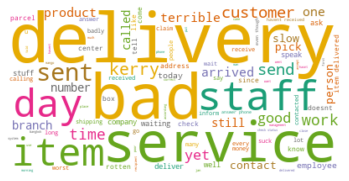

In [29]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

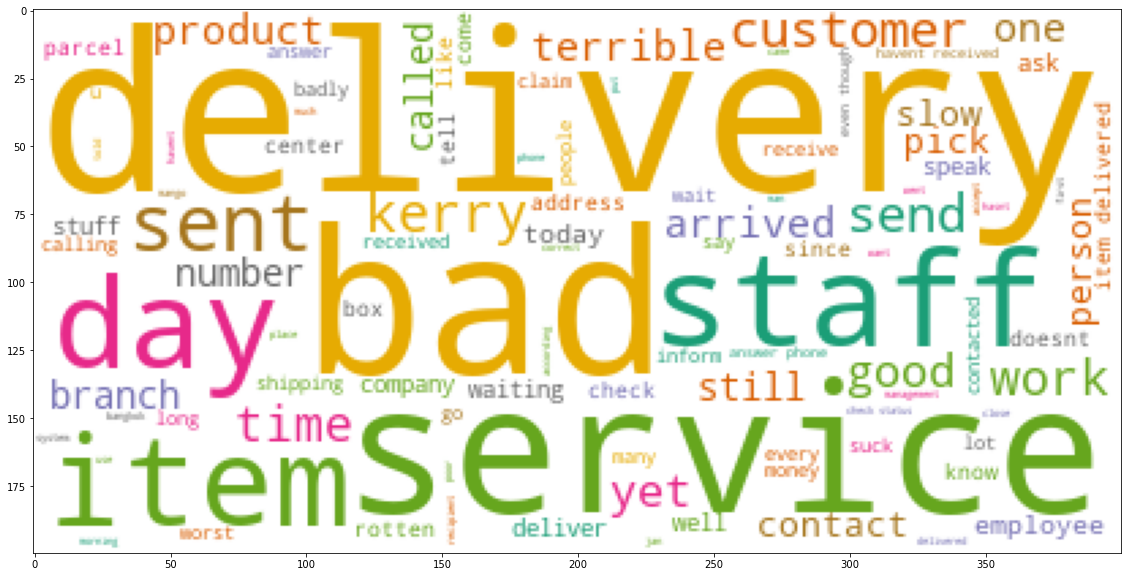

In [30]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [31]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['clean_2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'clean_2':'Late reviews'})

In [32]:
df_late

,Late reviews
58,waiting item delivered long time need order it...
83,destination collected slow waiting pick since ...
86,lat krabang area delivery slow cant compete tr...
106,terrible slow delivery available closed
107,difficult contact call pick hang cant contact ...
110,suck kerry firework rotten stuff doesnt delive...
146,send fruit kerry nakhon nayok system said marc...
149,notifying product delivered today waiting late...
163,slow delivery nation service staff terrible tr...
177,delivery long damaged good sent backboard ...


In [33]:
df_late.to_csv('Late_reviews_kerryth.csv')